In [1]:
import numpy as np
import pandas as pd

from IPython.core.display import display, HTML
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio


import seaborn as sns
from importlib import reload
import matplotlib.pyplot as plt
import matplotlib
import warnings

from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\NITRO 5\AppData\Local\Temp\ipykernel_11040\3351227904.py:4: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:

testing = pd.read_csv('UNSW_NB15_testing-set.csv', encoding='utf-8')
train = pd.read_csv('UNSW_NB15_training-set.csv', encoding='utf-8')

testing_df = pd.DataFrame(testing)
train_df = pd.DataFrame(train)

data_files = [
    'UNSW-NB15_1.csv',
    'UNSW-NB15_2.csv',
    'UNSW-NB15_3.csv',
    'UNSW-NB15_4.csv',
]

total_df = pd.concat((pd.read_csv(f) for f in data_files), ignore_index=True)



C:\Users\NITRO 5\AppData\Local\Temp\ipykernel_11040\3089525748.py:14: DtypeWarning: Columns (1,3,47) have mixed types. Specify dtype option on import or set low_memory=False.
  total_df = pd.concat((pd.read_csv(f) for f in data_files), ignore_index=True)
C:\Users\NITRO 5\AppData\Local\Temp\ipykernel_11040\3089525748.py:14: DtypeWarning: Columns (3,39,47) have mixed types. Specify dtype option on import or set low_memory=False.
  total_df = pd.concat((pd.read_csv(f) for f in data_files), ignore_index=True)


ทำการเลือกเฉพาะฟีเจอร์ที่ต้องการ

In [3]:
# สร้าง DataFrame หรือโหลดข้อมูลจากแหล่งข้อมูล
data1 = pd.read_csv("UNSW-NB15_1.csv") 
data2 = pd.read_csv("UNSW-NB15_2.csv")
data3 = pd.read_csv("UNSW-NB15_3.csv") 
data4 = pd.read_csv("UNSW-NB15_4.csv")

# เลือกเฉพาะคอลัมน์ที่คุณต้องการ
selected_columns1 = data1[["srcip", "sport", "dstip", "dsport", "proto", "dur", "sbytes", "dbytes", "service", "Spkts", "Dpkts"]]
selected_columns2 = data2[["srcip", "sport", "dstip", "dsport", "proto", "dur", "sbytes", "dbytes", "service", "Spkts", "Dpkts"]]
selected_columns3 = data3[["srcip", "sport", "dstip", "dsport", "proto", "dur", "sbytes", "dbytes", "service", "Spkts", "Dpkts"]]
selected_columns4 = data4[["srcip", "sport", "dstip", "dsport", "proto", "dur", "sbytes", "dbytes", "service", "Spkts", "Dpkts"]]

# สร้าง DataFrame ใหม่ที่มีเฉพาะคอลัมน์ที่คุณเลือก
df1 = pd.DataFrame(selected_columns1)
df2 = pd.DataFrame(selected_columns2)
df3 = pd.DataFrame(selected_columns3)
df4 = pd.DataFrame(selected_columns4)

train_df.head()



C:\Users\NITRO 5\AppData\Local\Temp\ipykernel_11040\201852868.py:2: DtypeWarning: Columns (1,3,47) have mixed types. Specify dtype option on import or set low_memory=False.
  data1 = pd.read_csv("UNSW-NB15_1.csv")
C:\Users\NITRO 5\AppData\Local\Temp\ipykernel_11040\201852868.py:3: DtypeWarning: Columns (3,39,47) have mixed types. Specify dtype option on import or set low_memory=False.
  data2 = pd.read_csv("UNSW-NB15_2.csv")


,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


เปลี่ยนค่า NaN จาก column attack_cat เป็น Normal

In [4]:
# ตรวจสอบและแทนค่า NaN ในคอลัมน์ "attack_cat" ด้วย "Normal"
train_df['attack_cat'] = train_df['attack_cat'].fillna('Normal')

ตรวจสอบ missing values

In [5]:
missing_values_training = train_df.isnull().sum()
missing_values_training

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

In [6]:
testing_df.shape
# removing the ID and the label column from the dataset
# testing_df = testing_df.drop('id', axis=1)
# testing_df = testing_df.drop('label', axis=1)

(175341, 45)

In [7]:
# removing the same from the training dataset

# train_df = train_df.drop('id', axis=1)
# train_df = train_df.drop('label', axis=1)
train_df.shape

(82332, 45)

In [8]:
# List columns in the training dataset
train_columns = train_df.columns
print("Columns in the Training DataFrame:")
print(train_columns)

# List columns in the testing dataset
test_columns = testing_df.columns
print("\nColumns in the Testing DataFrame:")
print(test_columns)

Columns in the Training DataFrame:
Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')

Columns in the Testing DataFrame:
Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_sr

In [9]:
# Assuming 'label' is the name of the target variable (change it if it's different)
target_variable = 'label'

# Calculate class counts in the training dataset
train_class_counts = train_df[target_variable].value_counts()
train_class_counts

label
1    45332
0    37000
Name: count, dtype: int64

C:\Users\NITRO 5\AppData\Local\Temp\ipykernel_11040\2199120543.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=train_class_counts.index, y=train_class_counts.values, palette="viridis")


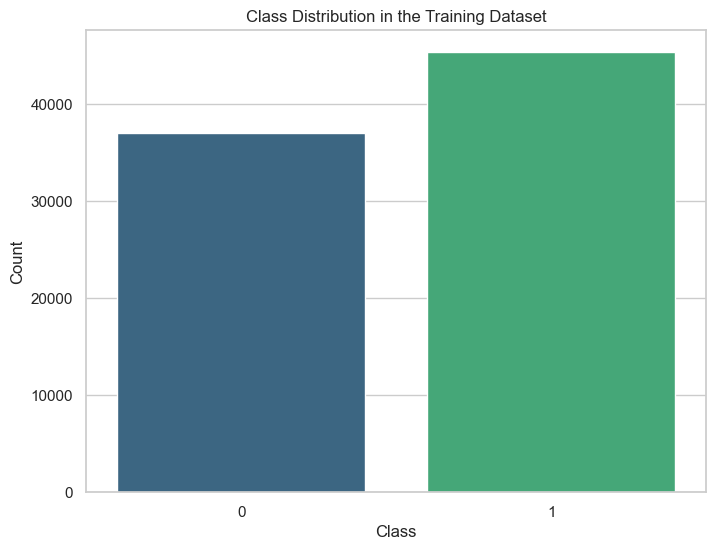

In [10]:
# Create a bar chart to visualize class distribution in the training dataset
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
sns.barplot(x=train_class_counts.index, y=train_class_counts.values, palette="viridis")
plt.title('Class Distribution in the Training Dataset')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

C:\Users\NITRO 5\AppData\Local\Temp\ipykernel_11040\3953324038.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=test_class_counts.index, y=test_class_counts.values, palette="viridis")


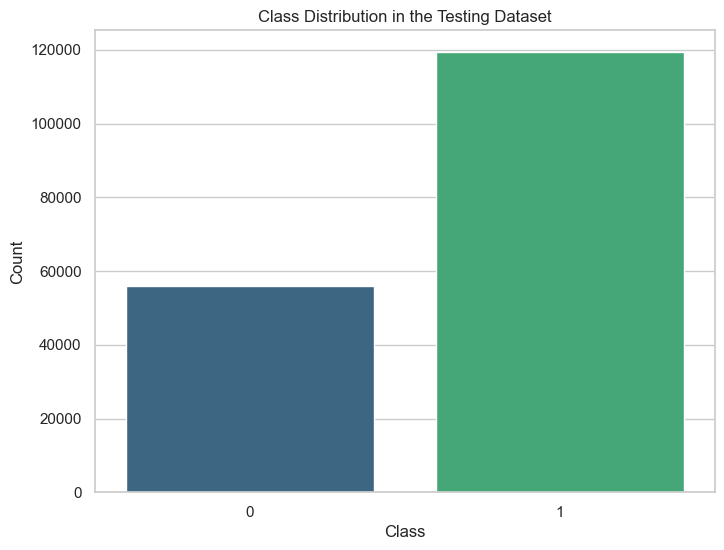

In [11]:
# Calculate class counts in the testing dataset
test_class_counts = testing_df[target_variable].value_counts()

# Create a bar chart to visualize class distribution in the testing dataset
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
sns.barplot(x=test_class_counts.index, y=test_class_counts.values, palette="viridis")
plt.title('Class Distribution in the Testing Dataset')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [12]:
test_class_counts

label
1    119341
0     56000
Name: count, dtype: int64

สุ่มกลุ่มตัวอย่าง โดยทำให้เท่ากัน

In [13]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import OneHotEncoder

# Assuming you have identified the target variable name as 'label'
target_variable = 'label'

# Extract features and target variable from the training dataset
X_train = train_df.drop(target_variable, axis=1)
y_train = train_df[target_variable]

# Identify the categorical columns in your dataset
categorical_columns = X_train.select_dtypes(include=['object']).columns

# Apply one-hot encoding to the categorical columns
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train[categorical_columns])

# Combine the one-hot encoded features with the numerical features
X_train_numeric = X_train.drop(categorical_columns, axis=1)
X_train_combined = np.hstack((X_train_numeric, X_train_encoded))

# Initialize the SMOTE object
smote = SMOTE(random_state=42)

# Apply SMOTE to oversample the minority class
X_resampled, y_resampled = smote.fit_resample(X_train_combined, y_train)

# Check the class distribution after oversampling
class_counts_resampled = Counter(y_resampled)
print("Class Distribution after SMOTE Oversampling:")
print(class_counts_resampled)

C:\Users\NITRO 5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Class Distribution after SMOTE Oversampling:
Counter({0: 45332, 1: 45332})


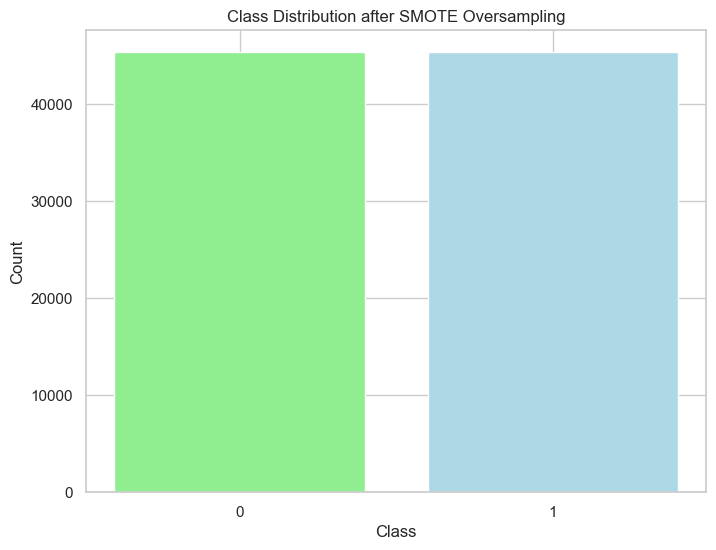

In [14]:
# class_counts_resampled is a Counter object
class_counts_resampled_dict = dict(class_counts_resampled)

# Separate class labels and their counts
class_labels = list(class_counts_resampled_dict.keys())
class_counts = list(class_counts_resampled_dict.values())

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(class_labels, class_counts, color=['lightgreen', 'lightblue'])
plt.xticks(class_labels)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution after SMOTE Oversampling')
plt.show()


In [15]:
train_df.describe(include='all')

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
count,82332.000000,82332.000000,82332,82332,82332,82332.000000,82332.000000,8.233200e+04,8.233200e+04,8.233200e+04,...,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332,82332.000000
unique,NaN,NaN,131,13,7,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN
top,NaN,NaN,tcp,-,FIN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal,NaN
freq,NaN,NaN,43095,47153,39339,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37000,NaN
mean,41166.500000,1.006756,NaN,NaN,NaN,18.666472,17.545936,7.993908e+03,1.323379e+04,8.241089e+04,...,3.663011,7.456360,0.008284,0.008381,0.129743,6.468360,9.164262,0.011126,NaN,0.550600
std,23767.345519,4.710444,NaN,NaN,NaN,133.916353,115.574086,1.716423e+05,1.514715e+05,1.486204e+05,...,5.915386,11.415191,0.091171,0.092485,0.638683,8.543927,11.121413,0.104891,NaN,0.497436
min,1.000000,0.000000,NaN,NaN,NaN,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,NaN,0.000000
25%,20583.750000,0.000008,NaN,NaN,NaN,2.000000,0.000000,1.140000e+02,0.000000e+00,2.860611e+01,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,NaN,0.000000
50%,41166.500000,0.014138,NaN,NaN,NaN,6.000000,2.000000,5.340000e+02,1.780000e+02,2.650177e+03,...,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,5.000000,0.000000,NaN,1.000000
75%,61749.250000,0.719360,NaN,NaN,NaN,12.000000,10.000000,1.280000e+03,9.560000e+02,1.111111e+05,...,3.000000,6.000000,0.000000,0.000000,0.000000,7.000000,11.000000,0.000000,NaN,1.000000


Drop irrelevant or excess feastures

In [16]:
list_drop = ['id','attack_cat']

In [17]:
train_df.drop(list_drop,axis=1,inplace=True)

Apply Clamping

In [18]:
# Clamp extreme Values
df_numeric = train_df.select_dtypes(include=[np.number])
df_numeric.describe(include='all')

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,82332.000000,82332.000000,82332.000000,8.233200e+04,8.233200e+04,8.233200e+04,82332.000000,82332.000000,8.233200e+04,8.233200e+04,...,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000
mean,1.006756,18.666472,17.545936,7.993908e+03,1.323379e+04,8.241089e+04,180.967667,95.713003,6.454902e+07,6.305470e+05,...,4.928898,3.663011,7.456360,0.008284,0.008381,0.129743,6.468360,9.164262,0.011126,0.550600
std,4.710444,133.916353,115.574086,1.716423e+05,1.514715e+05,1.486204e+05,101.513358,116.667722,1.798618e+08,2.393001e+06,...,8.389545,5.915386,11.415191,0.091171,0.092485,0.638683,8.543927,11.121413,0.104891,0.497436
min,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,2.860611e+01,62.000000,0.000000,1.120247e+04,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000
50%,0.014138,6.000000,2.000000,5.340000e+02,1.780000e+02,2.650177e+03,254.000000,29.000000,5.770032e+05,2.112951e+03,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,5.000000,0.000000,1.000000
75%,0.719360,12.000000,10.000000,1.280000e+03,9.560000e+02,1.111111e+05,254.000000,252.000000,6.514286e+07,1.585808e+04,...,4.000000,3.000000,6.000000,0.000000,0.000000,0.000000,7.000000,11.000000,0.000000,1.000000
max,59.999989,10646.000000,11018.000000,1.435577e+07,1.465753e+07,1.000000e+06,255.000000,253.000000,5.268000e+09,2.082111e+07,...,59.000000,38.000000,63.000000,2.000000,2.000000,16.000000,60.000000,62.000000,1.000000,1.000000


In [19]:
DEBUG =0

for feature in df_numeric.columns:
    if DEBUG == 1:
        print(feature)
        print('max = '+str(df_numeric[feature].max()))
        print('75th = '+str(df_numeric[feature].quantile(0.95)))
        print('median = '+str(df_numeric[feature].median()))
        print(df_numeric[feature].max()>10*df_numeric[feature].median())
        print('----------------------------------------------------')
    if df_numeric[feature].max()>10*df_numeric[feature].median() and df_numeric[feature].max()>10 :
        train_df[feature] = np.where(train_df[feature]<train_df[feature].quantile(0.95), train_df[feature], train_df[feature].quantile(0.95))

In [20]:
df_numeric = train_df.select_dtypes(include=[np.number])
df_numeric.describe(include='all')

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,82332.000000,82332.00000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,8.233200e+04,8.233200e+04,...,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000
mean,0.445016,11.84186,9.178424,1580.566135,2866.918367,71576.702810,180.967667,95.713003,4.649418e+07,3.105380e+05,...,4.466611,3.388901,7.160679,0.008284,0.008381,0.092066,5.974809,8.832532,0.011126,0.550600
std,0.672222,15.66461,14.504212,2948.850472,7525.606738,102631.946851,101.513358,116.667722,7.417784e+07,8.918691e+05,...,6.685037,5.029129,10.481621,0.091171,0.092485,0.289121,6.867156,10.124902,0.104891,0.497436
min,0.000000,1.00000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000008,2.00000,0.000000,114.000000,0.000000,28.606114,62.000000,0.000000,1.120247e+04,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000
50%,0.014138,6.00000,2.000000,534.000000,178.000000,2650.176667,254.000000,29.000000,5.770032e+05,2.112951e+03,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,5.000000,0.000000,1.000000
75%,0.719360,12.00000,10.000000,1280.000000,956.000000,111111.107200,254.000000,252.000000,6.514286e+07,1.585808e+04,...,4.000000,3.000000,6.000000,0.000000,0.000000,0.000000,7.000000,11.000000,0.000000,1.000000
max,2.403792,60.00000,54.000000,12472.000000,30622.000000,333333.321500,255.000000,253.000000,2.666667e+08,3.741446e+06,...,25.000000,18.000000,37.000000,2.000000,2.000000,1.000000,25.000000,36.000000,1.000000,1.000000


Apply log function to nearly all numeric, since they are all mostly skewed to the right

In [21]:
df_numeric = train_df.select_dtypes(include=[np.number])
df_before = df_numeric.copy()
DEBUG = 0
for feature in df_numeric.columns:
    if DEBUG == 1:
        print(feature)
        print('nunique = '+str(df_numeric[feature].nunique()))
        print(df_numeric[feature].nunique()>50)
        print('----------------------------------------------------')
    if df_numeric[feature].nunique()>50:
        if df_numeric[feature].min()==0:
            train_df[feature] = np.log(train_df[feature]+1)
        else:
            train_df[feature] = np.log(train_df[feature])

df_numeric = train_df.select_dtypes(include=[np.number])

Reduce the labels in catagorical features

In [22]:
df_cat = train_df.select_dtypes(exclude=[np.number])
df_cat.describe(include='all')

,proto,service,state
count,82332,82332,82332
unique,131,13,7
top,tcp,-,FIN
freq,43095,47153,39339


In [23]:
DEBUG = 0
for feature in df_cat.columns:
    if DEBUG == 1:
        print(feature)
        print('nunique = '+str(df_cat[feature].nunique()))
        print(df_cat[feature].nunique()>6)
        print(sum(train_df[feature].isin(train_df[feature].value_counts().head().index)))
        print('----------------------------------------------------')
    
    if df_cat[feature].nunique()>6:
        train_df[feature] = np.where(train_df[feature].isin(train_df[feature].value_counts().head().index), train_df[feature], '-')

In [24]:
df_cat = train_df.select_dtypes(exclude=[np.number])
df_cat.describe(include='all')

,proto,service,state
count,82332,82332,82332
unique,6,5,6
top,tcp,-,FIN
freq,43095,49275,39339


In [25]:
train_df['proto'].value_counts().head().index

Index(['tcp', 'udp', '-', 'unas', 'arp'], dtype='object', name='proto')

In [26]:
train_df['proto'].value_counts().index

Index(['tcp', 'udp', '-', 'unas', 'arp', 'ospf'], dtype='object', name='proto')

View before and after of features

In [27]:
# Feature Selection
from sklearn.feature_selection import SelectKBest, chi2

best_features = SelectKBest(score_func=chi2,k='all')

X = train_df.iloc[:,4:-2]
y = train_df.iloc[:,-1]   
fit = best_features.fit(X,y)

df_scores=pd.DataFrame(fit.scores_)
df_col=pd.DataFrame(X.columns)

feature_score=pd.concat([df_col,df_scores],axis=1)
feature_score.columns=['feature','score']
feature_score.sort_values(by=['score'],ascending=True,inplace=True)

fig = go.Figure(go.Bar(
            x=feature_score['score'][0:21],
            y=feature_score['feature'][0:21],
            orientation='h'))

fig.update_layout(title="Top 20 Features",
                  height=1200,
                  showlegend=False,
                 )

fig.show()

Encode categorical features

In [28]:
X = train_df.iloc[:,:-1]
y = train_df.iloc[:,-1]

In [29]:
X.head()
feature_names = list(X.columns)
np.shape(X)

(82332, 42)

In [30]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1,2,3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [31]:
np.shape(X)

(82332, 56)

In [32]:
df_cat.describe(include='all')

,proto,service,state
count,82332,82332,82332
unique,6,5,6
top,tcp,-,FIN
freq,43095,49275,39339


In [33]:
X[0]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
       0.00000000e+00, 1.09999395e-05, 6.93147181e-01, 0.00000000e+00,
       6.20657593e+00, 0.00000000e+00, 1.14176263e+01, 2.54000000e+02,
       0.00000000e+00, 1.90104856e+01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.09399400e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       5.51342875e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.00000000e+00, 2.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 2.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.00000000e+00, 2.00000000e+00, 0.00000000e+00])

In [34]:
len(feature_names)

42

In [35]:
for label in list(df_cat['state'].value_counts().index)[::-1][1:]:
    feature_names.insert(0,label)
    
for label in list(df_cat['service'].value_counts().index)[::-1][1:]:
    feature_names.insert(0,label)
    
for label in list(df_cat['proto'].value_counts().index)[::-1][1:]:
    feature_names.insert(0,label)

In [36]:
len(feature_names)

56

Modelling and Evaluation

Prep for Modelling

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 0,
                                                    stratify=y)

In [38]:
df_cat.describe(include='all')

,proto,service,state
count,82332,82332,82332
unique,6,5,6
top,tcp,-,FIN
freq,43095,49275,39339


In [39]:
# 6 + 5 + 6 unique = 17, therefore the first 17 rows will be the categories that have been encoded, start scaling from row 18 only.

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 18:] = sc.fit_transform(X_train[:, 18:])
X_test[:, 18:] = sc.transform(X_test[:, 18:])

# Logistical Classification

In [40]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
import time
from sklearn.linear_model import LogisticRegression
# Train the Logistic Regression model
model = LogisticRegression(max_iter=1000)  # You can increase max_iter as needed
start = time.time()
model.fit(X_train, y_train)
end_train = time.time()

Predict on the test data

In [41]:
start_predict = time.time()
y_predictions = model.predict(X_test)
end_predict = time.time()


Calculate accuracy, recall, precision, and F1-score

In [42]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')


In [43]:
print("Accuracy: " + "{:.2%}".format(accuracy))
print("Recall: " + "{:.2%}".format(recall))
print("Precision: " + "{:.2%}".format(precision))
print("F1-Score: " + "{:.2%}".format(f1s))
print("Time to train: " + "{:.2f}".format(end_train - start) + " s")
print("Time to predict: " + "{:.2f}".format(end_predict - start_predict) + " s")
print("Total time: " + "{:.2f}".format(end_predict - start) + " s")

Accuracy: 92.86%
Recall: 92.86%
Precision: 92.90%
F1-Score: 92.87%
Time to train: 3.37 s
Time to predict: 0.00 s
Total time: 3.38 s


Create a DataFrame to store model performance

In [44]:
model_performance = pd.DataFrame(columns=['Accuracy', 'Recall', 'Precision', 'F1-Score', 'Time to Train', 'Time to Predict', 'Total Time'])
model_performance.loc['Logistic'] = [accuracy, recall, precision, f1s, end_train - start, end_predict - start_predict, end_predict - start]

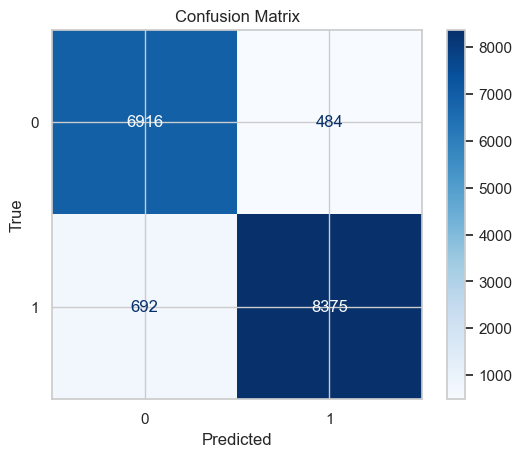

In [45]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Calculate the confusion matrix
confusion = confusion_matrix(y_test, y_predictions)

# Create a ConfusionMatrixDisplay object
cm = ConfusionMatrixDisplay(confusion, display_labels=model.classes_)

# Plot the confusion matrix with a custom colormap
cm.plot(cmap=plt.cm.Blues)  # You can specify the format of the values (in this case, integer format)

# Add labels for x and y axis
plt.xlabel('Predicted')
plt.ylabel('True')

# Set the title
plt.title('Confusion Matrix')

plt.show()

# kNN

In [46]:
%%time
from sklearn.neighbors import KNeighborsClassifier
start = time.time()
model = KNeighborsClassifier(n_neighbors=3).fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

CPU times: total: 7.33 s
Wall time: 1.01 s


In [47]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['kNN'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 95.04%
Recall: 95.04%
Precision: 95.09%
F1-Score: 95.05%
time to train: 0.01 s
time to predict: 1.01 s
total: 1.01 s


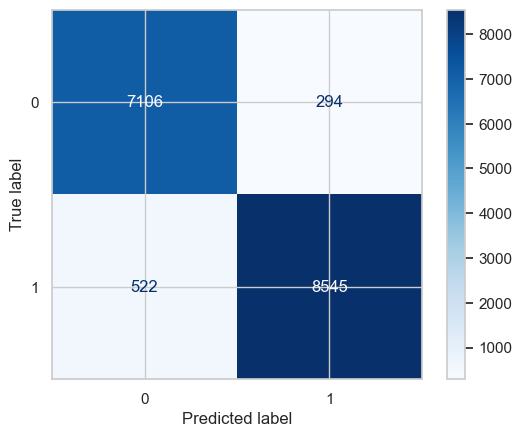

In [48]:
# Calculate the confusion matrix
confusion = confusion_matrix(y_test, y_predictions)

# Create a ConfusionMatrixDisplay object
cm = ConfusionMatrixDisplay(confusion, display_labels=model.classes_)

# Plot the confusion matrix with a custom colormap
cm.plot(cmap=plt.cm.Blues)

plt.show()

# Decision Tree

In [49]:
%%time
from sklearn.tree import DecisionTreeClassifier
start = time.time()
model = DecisionTreeClassifier().fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

CPU times: total: 547 ms
Wall time: 1.27 s


In [50]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Decision Tree'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]


Accuracy: 96.48%
Recall: 96.48%
Precision: 96.48%
F1-Score: 96.48%
time to train: 1.27 s
time to predict: 0.00 s
total: 1.27 s


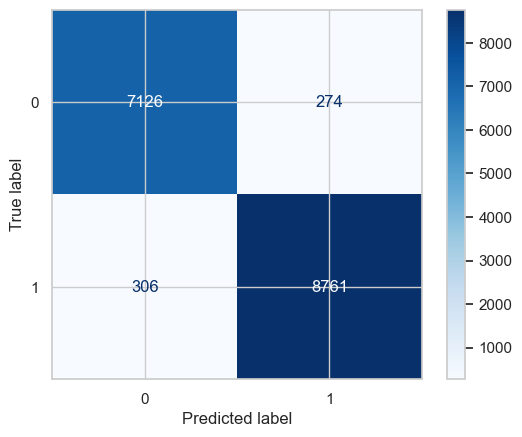

In [51]:
# Calculate the confusion matrix
confusion = confusion_matrix(y_test, y_predictions)

# Create a ConfusionMatrixDisplay object
cm = ConfusionMatrixDisplay(confusion, display_labels=model.classes_)

# Plot the confusion matrix with a custom colormap
cm.plot(cmap=plt.cm.Blues)

plt.show()

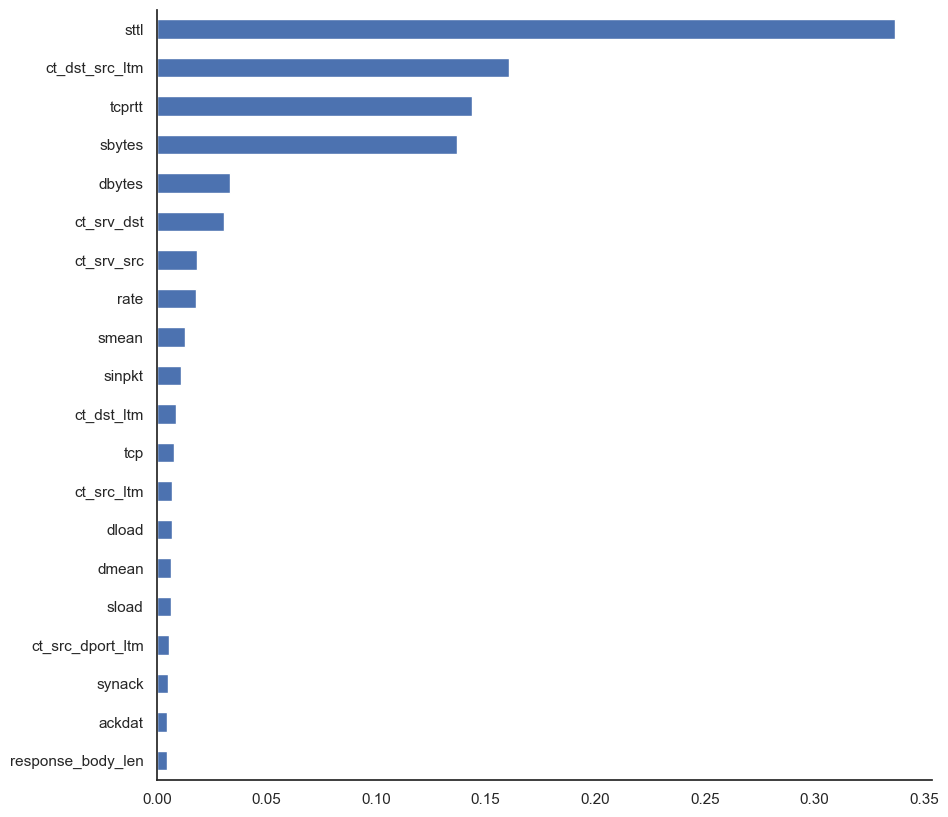

In [52]:
plt.rcParams['figure.figsize']=10,10
sns.set_style("white")
feat_importances = pd.Series(model.feature_importances_, index=feature_names)
feat_importances = feat_importances.groupby(level=0).mean()
feat_importances.nlargest(20).plot(kind='barh').invert_yaxis()
sns.despine()
plt.show()

# Extra Trees

In [53]:
%%time
from sklearn.ensemble import ExtraTreesClassifier
start = time.time()
model = ExtraTreesClassifier(random_state=0,n_jobs=-1).fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

CPU times: total: 9.91 s
Wall time: 912 ms


In [54]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Extra Trees'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 97.53%
Recall: 97.53%
Precision: 97.55%
F1-Score: 97.53%
time to train: 0.86 s
time to predict: 0.05 s
total: 0.91 s


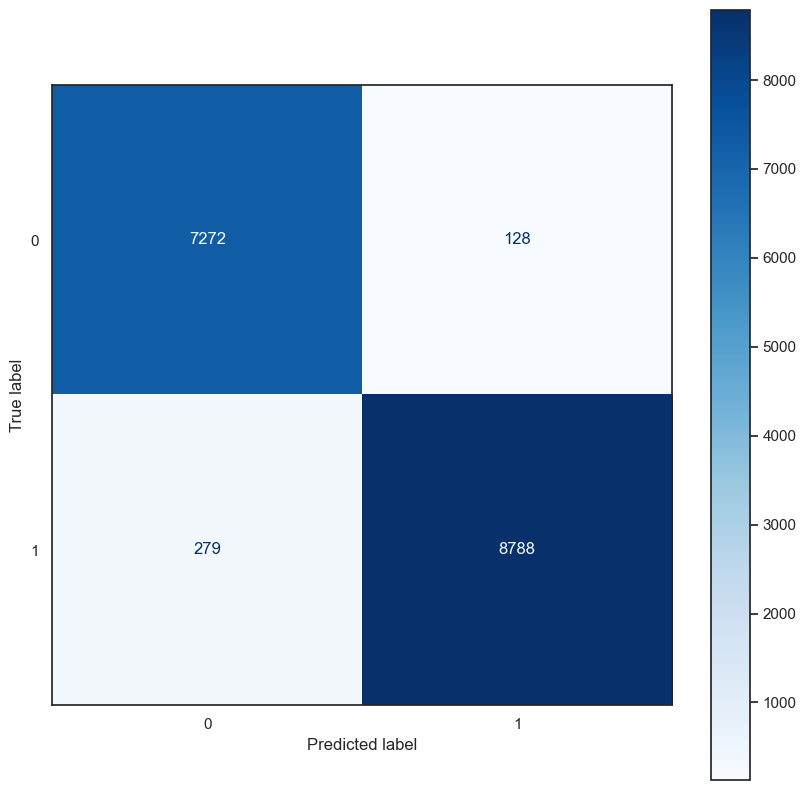

In [55]:
# Calculate the confusion matrix
confusion = confusion_matrix(y_test, y_predictions)

# Create a ConfusionMatrixDisplay object
cm = ConfusionMatrixDisplay(confusion, display_labels=model.classes_)

# Plot the confusion matrix with a custom colormap
cm.plot(cmap=plt.cm.Blues)

plt.show()

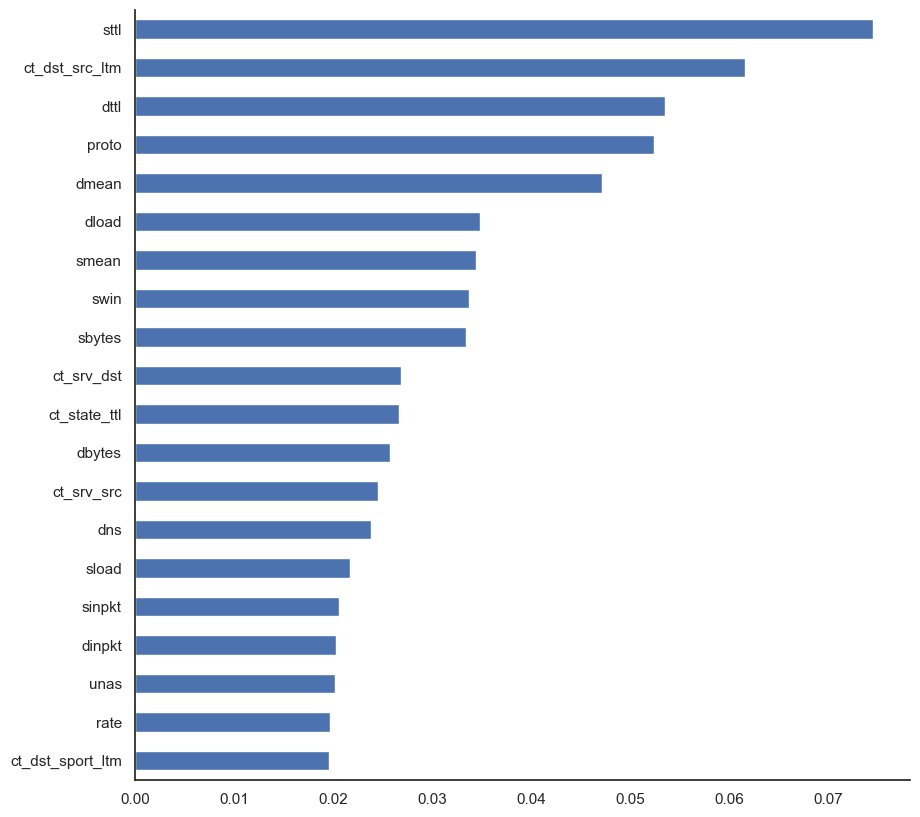

In [56]:
plt.rcParams['figure.figsize']=10,10
sns.set_style("white")
sns.despine()
feat_importances = pd.Series(model.feature_importances_, index=feature_names)
feat_importances = feat_importances.groupby(level=0).mean()
feat_importances.nlargest(20).plot(kind='barh').invert_yaxis()
sns.despine()
plt.show()

# Random Forest

In [57]:
%%time
from sklearn.ensemble import RandomForestClassifier
start = time.time()
model = RandomForestClassifier(n_estimators = 100,n_jobs=-1,random_state=0,bootstrap=True,).fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

CPU times: total: 26.6 s
Wall time: 1.84 s


In [58]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Random Forest'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 97.68%
Recall: 97.68%
Precision: 97.69%
F1-Score: 97.68%
time to train: 1.79 s
time to predict: 0.05 s
total: 1.84 s


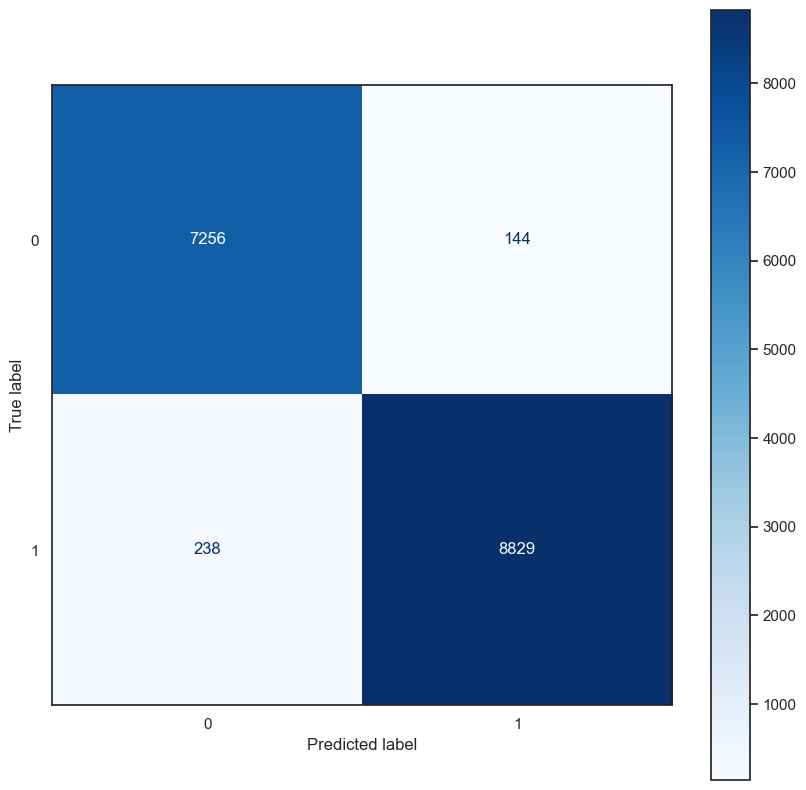

In [59]:
# Calculate the confusion matrix
confusion = confusion_matrix(y_test, y_predictions)

# Create a ConfusionMatrixDisplay object
cm = ConfusionMatrixDisplay(confusion, display_labels=model.classes_)

# Plot the confusion matrix with a custom colormap
cm.plot(cmap=plt.cm.Blues)

plt.show()

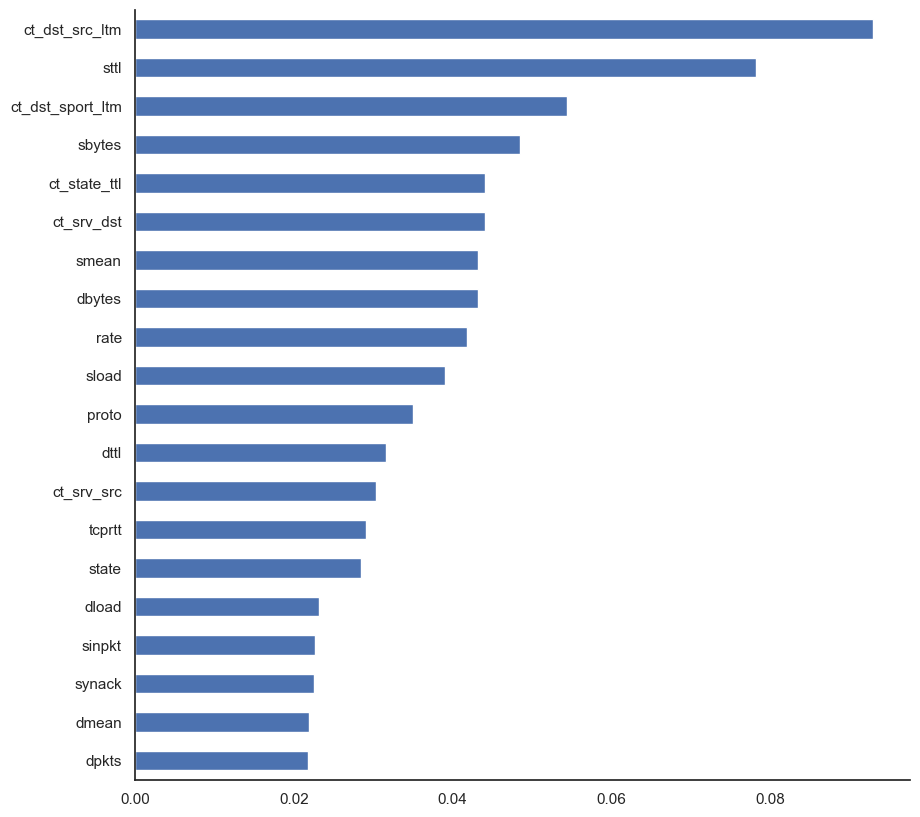

In [60]:
plt.rcParams['figure.figsize']=10,10
sns.set_style("white")
feat_importances = pd.Series(model.feature_importances_, index=feature_names)
feat_importances = feat_importances.groupby(level=0).mean()
feat_importances.nlargest(20).plot(kind='barh').invert_yaxis()
sns.despine()
plt.show()

# Gradient Boosting Classifier

In [61]:
%%time
from sklearn.ensemble import GradientBoostingClassifier
start = time.time()
model = GradientBoostingClassifier().fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

CPU times: total: 14.2 s
Wall time: 45 s


In [62]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Gradient Boosting Classifier'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 95.85%
Recall: 95.85%
Precision: 95.86%
F1-Score: 95.85%
time to train: 44.98 s
time to predict: 0.02 s
total: 45.01 s


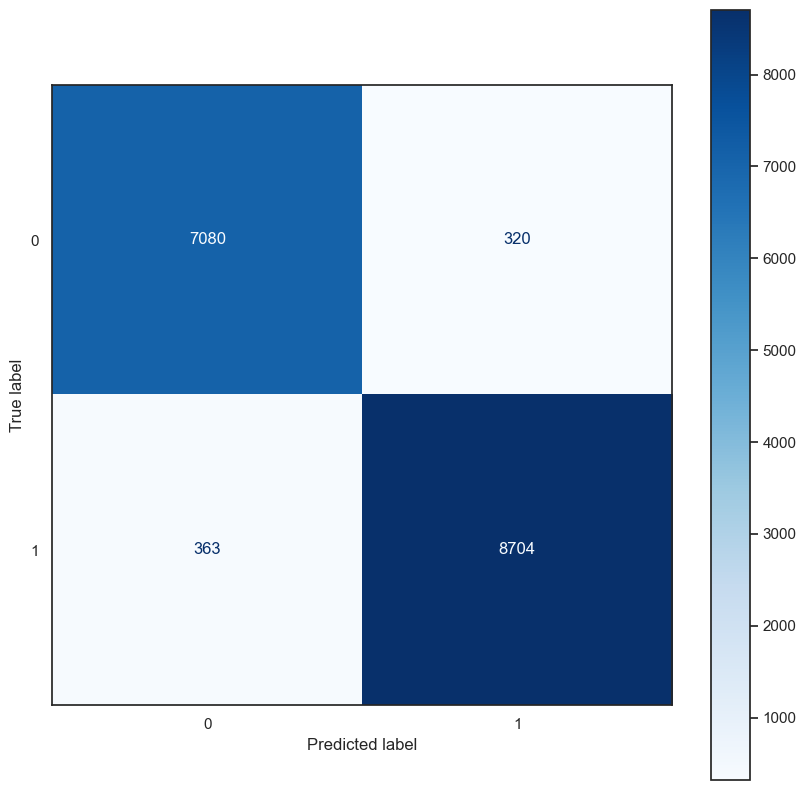

In [63]:
# Calculate the confusion matrix
confusion = confusion_matrix(y_test, y_predictions)

# Create a ConfusionMatrixDisplay object
cm = ConfusionMatrixDisplay(confusion, display_labels=model.classes_)

# Plot the confusion matrix with a custom colormap
cm.plot(cmap=plt.cm.Blues)

plt.show()

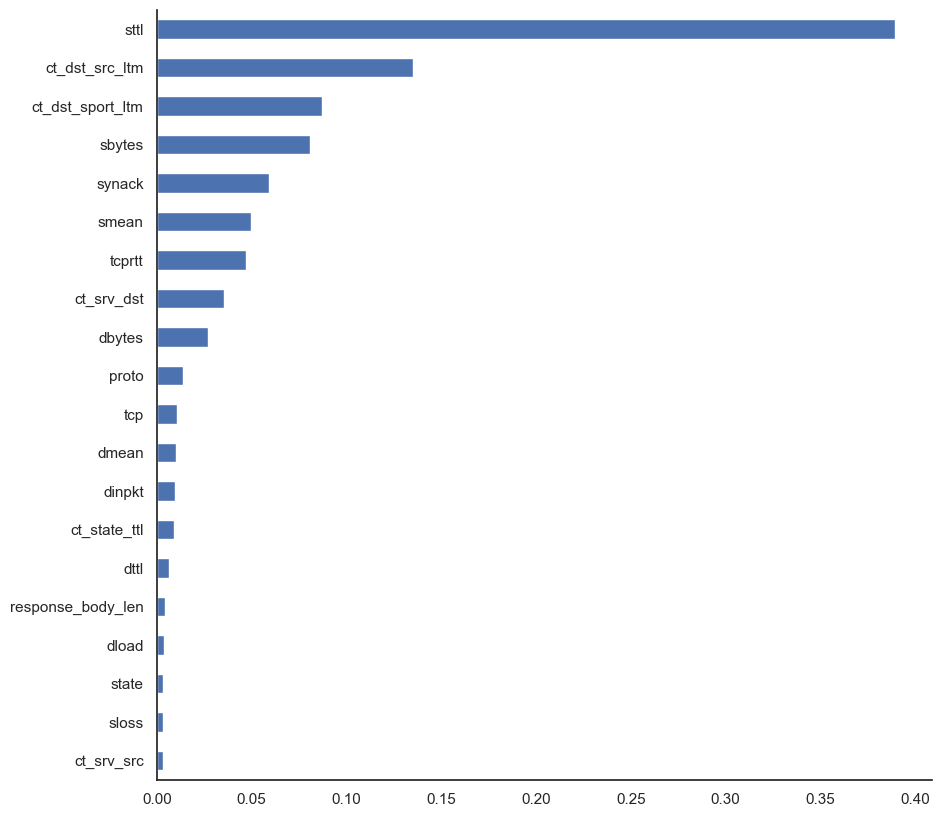

In [64]:
plt.rcParams['figure.figsize']=10,10
sns.set_style("white")
feat_importances = pd.Series(model.feature_importances_, index=feature_names)
feat_importances = feat_importances.groupby(level=0).mean()
feat_importances.nlargest(20).plot(kind='barh').invert_yaxis()
sns.despine()
plt.show()

# Neural Network MLP

In [65]:
%%time
from sklearn.neural_network import MLPClassifier
start = time.time()
model = MLPClassifier(hidden_layer_sizes = (20,20,), 
                      activation='relu', 
                      solver='adam',
                      batch_size=2000,
                      verbose=0).fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

CPU times: total: 1.27 s
Wall time: 16.5 s


In [66]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['MLP'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 96.36%
Recall: 96.36%
Precision: 96.38%
F1-Score: 96.36%
time to train: 16.49 s
time to predict: 0.01 s
total: 16.50 s


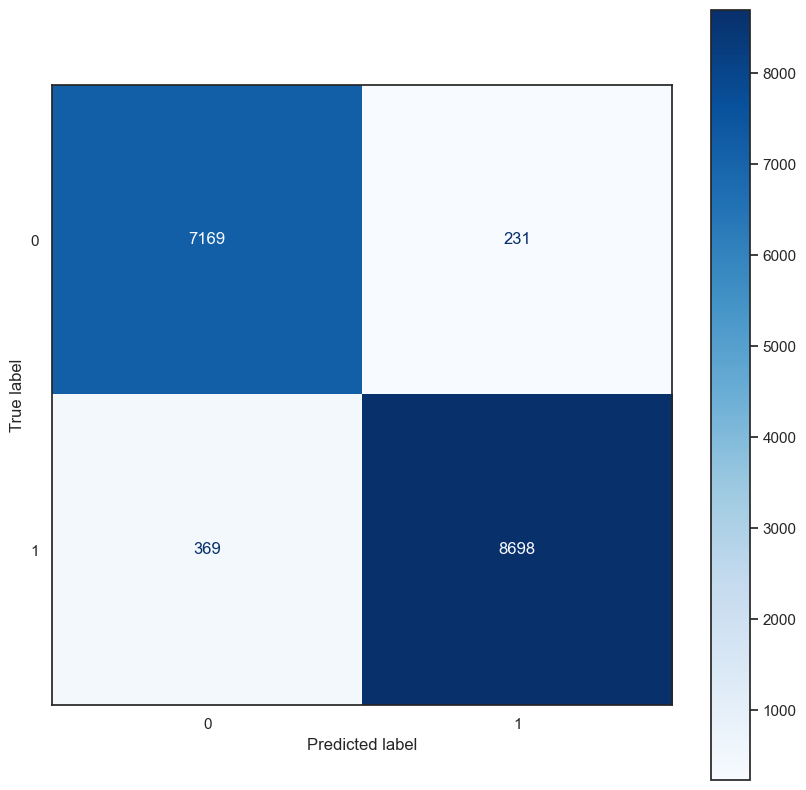

In [67]:
# Calculate the confusion matrix
confusion = confusion_matrix(y_test, y_predictions)

# Create a ConfusionMatrixDisplay object
cm = ConfusionMatrixDisplay(confusion, display_labels=model.classes_)

# Plot the confusion matrix with a custom colormap
cm.plot(cmap=plt.cm.Blues)

plt.show()

เปรียบเทียบโมเดล

In [68]:
model_performance.style.background_gradient(cmap='coolwarm').format({'Accuracy': '{:.2%}',
                                                                     'Precision': '{:.2%}',
                                                                     'Recall': '{:.2%}',
                                                                     'F1-Score': '{:.2%}',
                                                                     'time to train':'{:.1f}',
                                                                     'time to predict':'{:.1f}',
                                                                     'total time':'{:.1f}',
                                                                     })

,Accuracy,Recall,Precision,F1-Score,Time to Train,Time to Predict,Total Time
Logistic,92.86%,92.86%,92.90%,92.87%,3.365941,0.002001,3.375164
kNN,95.04%,95.04%,95.09%,95.05%,0.007007,1.007879,1.014886
Decision Tree,96.48%,96.48%,96.48%,96.48%,1.269904,0.004104,1.274008
Extra Trees,97.53%,97.53%,97.55%,97.53%,0.861354,0.050558,0.911912
Random Forest,97.68%,97.68%,97.69%,97.68%,1.793992,0.050862,1.844854
Gradient Boosting Classifier,95.85%,95.85%,95.86%,95.85%,44.984797,0.024980,45.009777
MLP,96.36%,96.36%,96.38%,96.36%,16.490254,0.005026,16.495280


# Neural Network MLP (Keras)

In [69]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU
from keras import metrics
import keras_metrics as km #when compiling
import keras
import numpy as np
from numpy import array

In [70]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [71]:
#Build the feed forward neural network model
def build_model():
    model = Sequential()
    model.add(Dense(20, input_dim=56, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(20, activation='softmax')) #for multiclass classification
    #Compile the model
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',
                  metrics=['accuracy',f1_m,precision_m, recall_m]
                 )
    return model

#institate the model
model = build_model()

#fit the model
start = time.time()
model.fit(X_train, y_train, epochs=200, batch_size=2000,verbose=2)
end_train = time.time()

Epoch 1/200
33/33 - 1s - loss: 2.8882 - accuracy: 0.1775 - f1_m: 0.0195 - precision_m: 0.1197 - recall_m: 0.0108 - 635ms/epoch - 19ms/step
Epoch 2/200
33/33 - 0s - loss: 1.7180 - accuracy: 0.5793 - f1_m: 0.5541 - precision_m: 0.9255 - recall_m: 0.4241 - 64ms/epoch - 2ms/step
Epoch 3/200
33/33 - 0s - loss: 0.8825 - accuracy: 0.6690 - f1_m: 0.7512 - precision_m: 0.7520 - recall_m: 0.7544 - 68ms/epoch - 2ms/step
Epoch 4/200
33/33 - 0s - loss: 0.5335 - accuracy: 0.7695 - f1_m: 0.6991 - precision_m: 0.5892 - recall_m: 0.8640 - 68ms/epoch - 2ms/step
Epoch 5/200
33/33 - 0s - loss: 0.4308 - accuracy: 0.7856 - f1_m: 0.7052 - precision_m: 0.5616 - recall_m: 0.9478 - 81ms/epoch - 2ms/step
Epoch 6/200
33/33 - 0s - loss: 0.3754 - accuracy: 0.8166 - f1_m: 0.7080 - precision_m: 0.5550 - recall_m: 0.9776 - 65ms/epoch - 2ms/step
Epoch 7/200
33/33 - 0s - loss: 0.3328 - accuracy: 0.8517 - f1_m: 0.7086 - precision_m: 0.5517 - recall_m: 0.9903 - 63ms/epoch - 2ms/step
Epoch 8/200
33/33 - 0s - loss: 0.2992 -

In [72]:
#Evaluate the neural network
loss, accuracy, f1s, precision, recall = model.evaluate(X_test, y_test)
end_predict = time.time()
model_performance.loc['MLP (Keras)'] = [accuracy, accuracy, accuracy, accuracy,end_train-start,end_predict-end_train,end_predict-start]

515/515 [==============================] - 1s 833us/step - loss: 0.0948 - accuracy: 0.9613 - f1_m: 0.7060 - precision_m: 0.5505 - recall_m: 1.0000


GRU (Keras)

In [73]:
#Build the neural network model
def build_model():
    model = Sequential()
    model.add(GRU(20, return_sequences=True,input_shape=(1,56)))
    model.add(GRU(20, return_sequences=True))
    model.add(Dense(10, activation='softmax')) #for multiclass classification
    #Compile the model
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',
                  # metrics=['accuracy',f1_m,precision_m, recall_m]
                  metrics=['accuracy']
                 )
    return model

#The GRU input layer must be 3D.
#The meaning of the 3 input dimensions are: samples, time steps, and features.
#reshape input data
X_train_array = array(X_train) #array has been declared in the previous cell
print(len(X_train_array))
X_train_reshaped = X_train_array.reshape(X_train_array.shape[0],1,56)

#reshape output data
X_test_array=  array(X_test)
X_test_reshaped = X_test_array.reshape(X_test_array.shape[0],1,56) 


#institate the model
model = build_model()

start = time.time()
#fit the model
model.fit(X_train_reshaped, y_train, epochs=200, batch_size=2000,verbose=2)
end_train = time.time()

65865
Epoch 1/200
33/33 - 3s - loss: 2.0981 - accuracy: 0.4483 - 3s/epoch - 86ms/step
Epoch 2/200
33/33 - 0s - loss: 1.4006 - accuracy: 0.6926 - 156ms/epoch - 5ms/step
Epoch 3/200
33/33 - 0s - loss: 0.8163 - accuracy: 0.7217 - 155ms/epoch - 5ms/step
Epoch 4/200
33/33 - 0s - loss: 0.6031 - accuracy: 0.7512 - 156ms/epoch - 5ms/step
Epoch 5/200
33/33 - 0s - loss: 0.5246 - accuracy: 0.7600 - 170ms/epoch - 5ms/step
Epoch 6/200
33/33 - 0s - loss: 0.4675 - accuracy: 0.7697 - 159ms/epoch - 5ms/step
Epoch 7/200
33/33 - 0s - loss: 0.4134 - accuracy: 0.7929 - 155ms/epoch - 5ms/step
Epoch 8/200
33/33 - 0s - loss: 0.3657 - accuracy: 0.8246 - 154ms/epoch - 5ms/step
Epoch 9/200
33/33 - 0s - loss: 0.3221 - accuracy: 0.8571 - 166ms/epoch - 5ms/step
Epoch 10/200
33/33 - 0s - loss: 0.2831 - accuracy: 0.8727 - 155ms/epoch - 5ms/step
Epoch 11/200
33/33 - 0s - loss: 0.2543 - accuracy: 0.8890 - 156ms/epoch - 5ms/step
Epoch 12/200
33/33 - 0s - loss: 0.2337 - accuracy: 0.8995 - 157ms/epoch - 5ms/step
Epoch 13/

In [74]:
loss, accuracy = model.evaluate(X_test_reshaped, y_test)
# loss, accuracy, f1s, precision, recall = model.evaluate(X_test_reshaped, y_test)
end_predict = time.time()
model_performance.loc['GRU (Keras)'] = [accuracy, accuracy, accuracy, accuracy, end_train-start,end_predict-end_train,end_predict-start]

515/515 [==============================] - 1s 1ms/step - loss: 0.0866 - accuracy: 0.9670


In [75]:
np.shape(X)

(82332, 56)

# LSTM (Keras)

In [76]:
def build_model():
    model = Sequential()
    model.add(LSTM(20, return_sequences=True,input_shape=(1,56)))
    model.add(LSTM(20, return_sequences=True))
    model.add(Dense(10, activation='softmax')) #for multiclass classification
    #Compile the model
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',
                  # metrics=['accuracy',f1_m,precision_m, recall_m]
                  metrics=['accuracy']
                 )
    return model

#The LSTM input layer must be 3D.
#The meaning of the 3 input dimensions are: samples, time steps, and features.
#reshape input data
X_train_array = array(X_train) #array has been declared in the previous cell
print(len(X_train_array))
X_train_reshaped = X_train_array.reshape(X_train_array.shape[0],1,56)

#reshape output data
X_test_array=  array(X_test)
X_test_reshaped = X_test_array.reshape(X_test_array.shape[0],1,56) 


#institate the model
model = build_model()


#fit the model
start = time.time()
model.fit(X_train_reshaped, y_train, epochs=200, batch_size=2000,verbose=2)
end_train = time.time()

65865
Epoch 1/200
33/33 - 3s - loss: 2.2036 - accuracy: 0.6395 - 3s/epoch - 80ms/step
Epoch 2/200
33/33 - 0s - loss: 1.8187 - accuracy: 0.7006 - 176ms/epoch - 5ms/step
Epoch 3/200
33/33 - 0s - loss: 1.2366 - accuracy: 0.6980 - 174ms/epoch - 5ms/step
Epoch 4/200
33/33 - 0s - loss: 0.8387 - accuracy: 0.7037 - 176ms/epoch - 5ms/step
Epoch 5/200
33/33 - 0s - loss: 0.6501 - accuracy: 0.7462 - 173ms/epoch - 5ms/step
Epoch 6/200
33/33 - 0s - loss: 0.5593 - accuracy: 0.7597 - 174ms/epoch - 5ms/step
Epoch 7/200
33/33 - 0s - loss: 0.4984 - accuracy: 0.7725 - 176ms/epoch - 5ms/step
Epoch 8/200
33/33 - 0s - loss: 0.4418 - accuracy: 0.7853 - 175ms/epoch - 5ms/step
Epoch 9/200
33/33 - 0s - loss: 0.3858 - accuracy: 0.8043 - 195ms/epoch - 6ms/step
Epoch 10/200
33/33 - 0s - loss: 0.3313 - accuracy: 0.8557 - 178ms/epoch - 5ms/step
Epoch 11/200
33/33 - 0s - loss: 0.2813 - accuracy: 0.8840 - 173ms/epoch - 5ms/step
Epoch 12/200
33/33 - 0s - loss: 0.2461 - accuracy: 0.8958 - 177ms/epoch - 5ms/step
Epoch 13/

In [77]:
#Evaluate the neural network
loss, accuracy = model.evaluate(X_test_reshaped, y_test)
# loss, accuracy, f1s, precision, recall = model.evaluate(X_test_reshaped, y_test)
end_predict = time.time()
model_performance.loc['LSTM (Keras)'] = [accuracy, accuracy, accuracy, accuracy,end_train-start,end_predict-end_train,end_predict-start]

515/515 [==============================] - 1s 1ms/step - loss: 0.0891 - accuracy: 0.9649


# Evaluate

In [78]:
model_performance.fillna(.90,inplace=True)
model_performance.style.background_gradient(cmap='coolwarm').format({'Accuracy': '{:.2%}',
                                                                     'Precision': '{:.2%}',
                                                                     'Recall': '{:.2%}',
                                                                     'F1-Score': '{:.2%}',
                                                                     'time to train':'{:.1f}',
                                                                     'time to predict':'{:.1f}',
                                                                     'total time':'{:.1f}',
                                                                     })

,Accuracy,Recall,Precision,F1-Score,Time to Train,Time to Predict,Total Time
Logistic,92.86%,92.86%,92.90%,92.87%,3.365941,0.002001,3.375164
kNN,95.04%,95.04%,95.09%,95.05%,0.007007,1.007879,1.014886
Decision Tree,96.48%,96.48%,96.48%,96.48%,1.269904,0.004104,1.274008
Extra Trees,97.53%,97.53%,97.55%,97.53%,0.861354,0.050558,0.911912
Random Forest,97.68%,97.68%,97.69%,97.68%,1.793992,0.050862,1.844854
Gradient Boosting Classifier,95.85%,95.85%,95.86%,95.85%,44.984797,0.024980,45.009777
MLP,96.36%,96.36%,96.38%,96.36%,16.490254,0.005026,16.495280
MLP (Keras),96.13%,96.13%,96.13%,96.13%,14.491148,0.636211,15.127360
GRU (Keras),96.70%,96.70%,96.70%,96.70%,35.364386,1.164160,36.528547
LSTM (Keras),96.49%,96.49%,96.49%,96.49%,38.477828,1.141543,39.619371
